In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [99]:
#Сырые данные
raw_data = [('208500', 'Дерево', 'ЮБ', 'Коттедж', 'Мансардная', 'Газон'),
 ('181500', 'Кирпич', 'СВ', 'Коттедж', 'Односкатная', 'Газон'),
 ('223500', 'Краска', 'ЮБ', 'Таунхаус', 'Двускатная', 'Японский сад'),
 ('140000', 'Дерево', 'МР', 'Коттедж', 'Мансардная', 'Пруд'),
 ('250000', 'Дерево', 'СВ', 'Коттедж', 'Мансардная', 'Пруд'),
 ('143000', 'Дерево', 'ЮБ', 'Дуплекс', 'Двускатная', 'Японский сад'),
 ('307000', 'Краска', 'ЮБ', 'Коттедж', 'Двускатная', 'Газон'),
 ('200000', 'Штукатурка', 'МР', 'Таунхаус', 'Многощипцовая', 'Клумбы'),
 ('129900', 'Дерево', 'СТ', 'Таунхаус', 'Односкатная', 'Клумбы'),
 ('118000', 'Штукатурка', 'МР', 'Таунхаус', 'Многощипцовая', 'Газон'),
 ('129500', 'Дерево', 'ЮБ', 'Коттедж', 'Мансардная', 'Сад'),
 ('345000', 'Дерево', 'ЮБ', 'Коттедж', 'Односкатная', 'Сад'),
 ('144000', 'Штукатурка', 'ЮБ', 'Дуплекс', 'Многощипцовая', 'Газон'),
 ('279500', 'Дерево', 'ЮБ', 'Коттедж', 'Мансардная', 'Газон'),
 ('157000', 'Дерево', 'МР', 'Коттедж', 'Мансардная', 'Клумбы'),
 ('132000', 'Кирпич', 'МР', 'Таунхаус', 'Мансардная', 'Газон'),
 ('149000', 'Краска', 'СТ', 'Коттедж', 'Односкатная', 'Сад'),
 ('90000', 'Дерево', 'СТ', 'Дуплекс', 'Двускатная', 'Пруд'),
 ('159000', 'Дерево', 'ЮБ', 'Коттедж', 'Мансардная', 'Газон'),
 ('139000', 'Штукатурка', 'ЮБ', 'Дуплекс', 'Многощипцовая', 'Сад')]

In [100]:
columns_name = ['Цена', 'Материал отделки', 'Район', 'Тип дома', 'Тип крыши', 'Ландшафт']

In [101]:
data = pd.DataFrame(raw_data, columns=columns_name)

In [102]:
data.head()

,Цена,Материал отделки,Район,Тип дома,Тип крыши,Ландшафт
0,208500,Дерево,ЮБ,Коттедж,Мансардная,Газон
1,181500,Кирпич,СВ,Коттедж,Односкатная,Газон
2,223500,Краска,ЮБ,Таунхаус,Двускатная,Японский сад
3,140000,Дерево,МР,Коттедж,Мансардная,Пруд
4,250000,Дерево,СВ,Коттедж,Мансардная,Пруд


In [103]:
data.shape

(20, 6)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Цена              20 non-null     object
 1   Материал отделки  20 non-null     object
 2   Район             20 non-null     object
 3   Тип дома          20 non-null     object
 4   Тип крыши         20 non-null     object
 5   Ландшафт          20 non-null     object
dtypes: object(6)
memory usage: 1.1+ KB


In [105]:
data.describe()

,Цена,Материал отделки,Район,Тип дома,Тип крыши,Ландшафт
count,20,20,20,20,20,20
unique,20,4,4,3,4,5
top,208500,Дерево,ЮБ,Коттедж,Мансардная,Газон
freq,1,11,10,11,8,8


In [106]:
def MyLabelEncoder(categorical_feature):
    unique_labels = list(set(categorical_feature))
    label_dict = {label: idx for idx, label in enumerate(unique_labels)}
    encoded_data = [label_dict[label] for label in categorical_feature]
    return encoded_data

In [107]:
target = ['Цена']
train_feature = ['Ландшафт']

In [108]:
data['Ландшафт'] = MyLabelEncoder(data['Ландшафт'])

In [109]:
data

,Цена,Материал отделки,Район,Тип дома,Тип крыши,Ландшафт
0,208500,Дерево,ЮБ,Коттедж,Мансардная,1
1,181500,Кирпич,СВ,Коттедж,Односкатная,1
2,223500,Краска,ЮБ,Таунхаус,Двускатная,3
3,140000,Дерево,МР,Коттедж,Мансардная,2
4,250000,Дерево,СВ,Коттедж,Мансардная,2
5,143000,Дерево,ЮБ,Дуплекс,Двускатная,3
6,307000,Краска,ЮБ,Коттедж,Двускатная,1
7,200000,Штукатурка,МР,Таунхаус,Многощипцовая,4
8,129900,Дерево,СТ,Таунхаус,Односкатная,4
9,118000,Штукатурка,МР,Таунхаус,Многощипцовая,1


In [110]:
X = np.array(data[train_feature], dtype=np.float64)
y = np.array(data['Цена'], dtype=np.float64)[:, np.newaxis]

Линейные методы предполагают, что между признаками объекта (features) и целевой переменной (target/label) существует линейная зависимость, то есть
$$y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b, $$ где $у$ --- целевая переменная (что мы хотим предсказать), $x_i$ --- признак объекта $х$, $w_i$ --- вес $i$-го признака, $b$ --- bias (смещение, свободный член)

Часто предполагают, что объект $х$ содержит в себе фиктивный признак равный 1 для представления свободного члена $b$. В этом случае формула принимает простой вид:
$$y = \langle w, x \rangle,$$
где $\langle \cdot, \cdot \rangle$ -- скалярное произведение векторов $w, x \in \mathbb{R}^n$.

В матричной форме, в случае, когда у нас есть $m$ объектов формулу можно переписать следующим образом:
$$ Y = Xw, $$ где $Y$ -- столбец размера $n$, $X$ --- матрица признаков размера $n \times k$ (каждая строка матрицы есть описание признаков объекта), $w$ -- вектор весов размера $k$.


###  Аналитическое решение

Минимизация ошибки по методу наименьших квадратов дает решение: $$ w = (X^TX)^{-1}X^TY $$

Реализуем класс линейной регрессии с помощью этой формулы.

In [ ]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке

        n, k = X.shape

        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

        return self

    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred

    def get_weights(self):
        return self.w

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [120]:
regressor = MyLinearRegression()

regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
w = regressor.get_weights()
w

array([[  3401.86335404],
       [162206.83229814]])

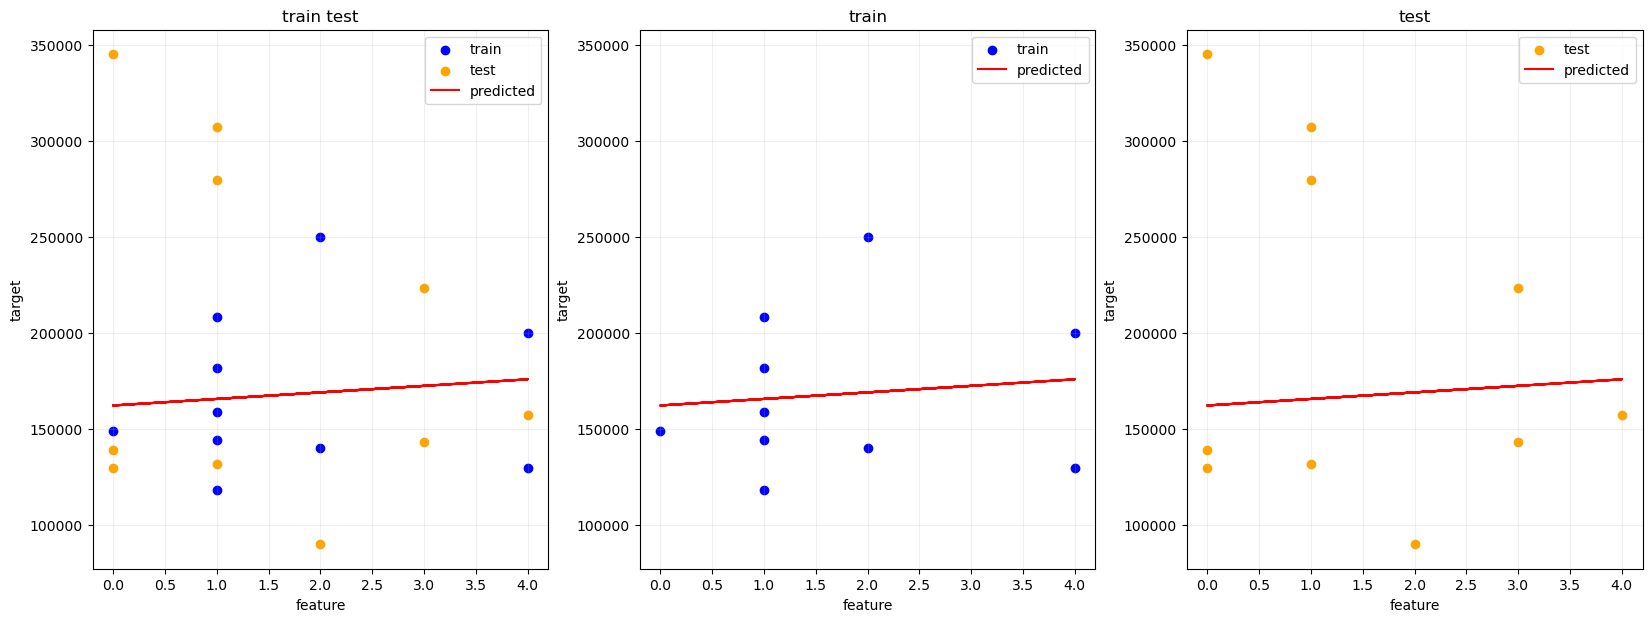

In [121]:
plt.figure(figsize=(20, 7))

ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train', c='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test', c='orange')

    plt.plot(X, regressor.predict(X), label='predicted', c='r')

    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(" ".join(types))
    plt.grid(alpha=0.2)
    plt.legend()

plt.show()

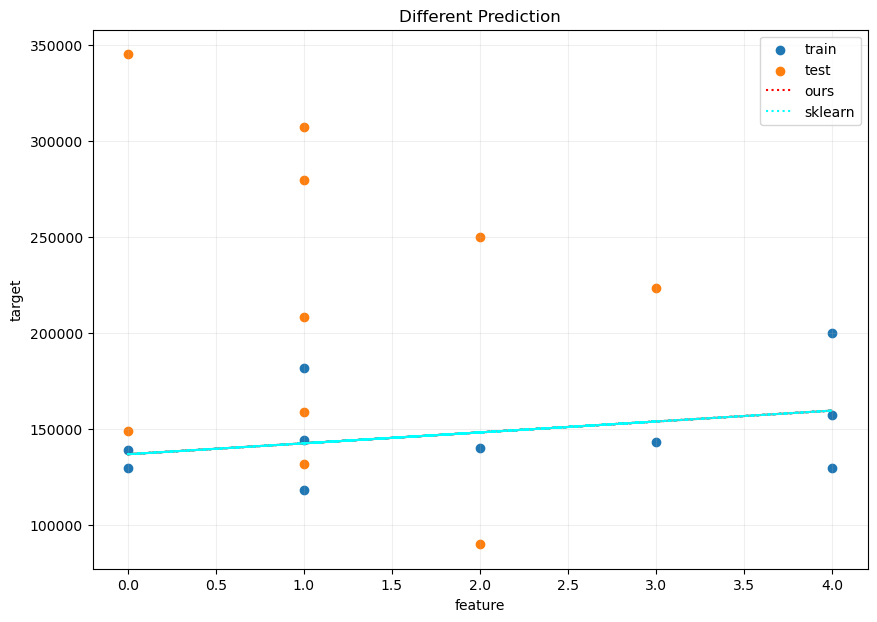

In [114]:
sk_reg = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 7))


plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X), label='ours', c='r', linestyle=':')
plt.plot(X, sk_reg.predict(X), label='sklearn', c='cyan', linestyle=':')

plt.title("Different Prediction")
plt.ylabel('target')
plt.xlabel('feature')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [124]:
train_predictions = regressor.predict(X_train)
test_predictions = regressor.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, train_predictions))
print('Test MSE: ', mean_squared_error(y_test, test_predictions))

Train MSE:  1513778894.4099379
Test MSE:  7918558763.705103
